<h2>Load data</h2>

In [1]:
from numpy import loadtxt
import numpy as np

# load data
import pandas as pd
df = pd.read_csv('data/glass_exp.csv')
np_data = df.values

# split data into X and y
X_raw = np_data[:,0:9]
Y = pd.factorize(np_data[:,9])[0]

# Normalize attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.astype(np.float64))

# set seed to randomizer
seed = 7

# Show min, max and range of attributes
attr_min = X.min(0)
attr_max = X.max(0)
attr_range = attr_max - attr_min
print(attr_min)
print(attr_max)
print(attr_range)

[-2.38151559 -3.28694275 -1.86551055 -2.31861565 -3.67647162 -0.76391864
 -2.48408356 -0.35287683 -0.5864509 ]
[5.13723188 4.87563749 1.25463857 4.12585061 3.57052422 8.78014487
 5.09431802 5.99721046 4.65988118]
[7.51874747 8.16258024 3.12014912 6.44446626 7.24699583 9.54406351
 7.57840158 6.35008729 5.24633208]


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y, predictions)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 69.16%
Confusion Matrix:
[[108   0   0  32   0   0]
 [ 16   0   0  18   0   0]
 [  0   0  18   0   0   0]
 [ 42   0   4  96   0  10]
 [  0   0   0   2  56   0]
 [  0   0   0   6   2  18]]


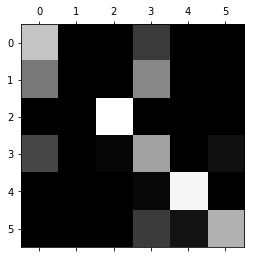


-- 10-fold CV --
Average accuracy: 67.52%
Confusion Matrix:
[[103   1   0  36   0   0]
 [ 17   0   0  17   0   0]
 [  0   0  18   0   0   0]
 [ 39   2   3 105   0   3]
 [  4   0   0   2  50   2]
 [  0   0   0  11   2  13]]


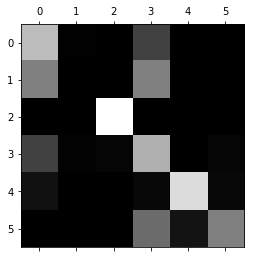

In [3]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 84.58%
Confusion Matrix:
[[118   2   0  20   0   0]
 [ 10  14   0  10   0   0]
 [  0   0  18   0   0   0]
 [ 22   0   0 130   0   0]
 [  2   0   0   0  56   0]
 [  0   0   0   0   0  26]]


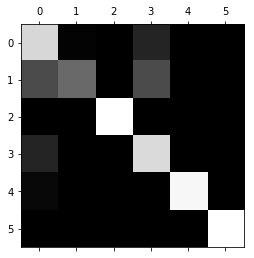


-- 10-fold CV --
Average accuracy: 93.46%
Confusion Matrix:
[[128   2   0  10   0   0]
 [  6  28   0   0   0   0]
 [  0   0  18   0   0   0]
 [  8   2   0 142   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0  26]]


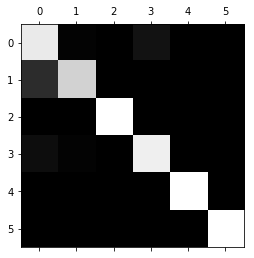

In [11]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Decision Tree classifier</h2>

-- Training data --
Accuracy: 88.79%
Confusion Matrix:
[[130   0   0   8   2   0]
 [  4  28   0   2   0   0]
 [  2   2  12   2   0   0]
 [  6   4   2 136   2   2]
 [  2   2   0   2  52   0]
 [  0   0   2   0   2  22]]


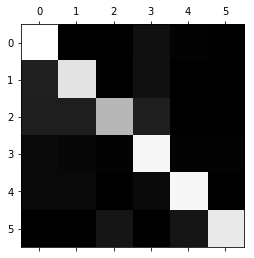


-- 10-fold CV --
Average accuracy: 80.61%
Confusion Matrix:
[[124   2   0  12   2   0]
 [  2  20   1  11   0   0]
 [  3   2  10   3   0   0]
 [ 16   7   0 121   2   6]
 [  2   4   0   2  50   0]
 [  0   0   2   2   2  20]]


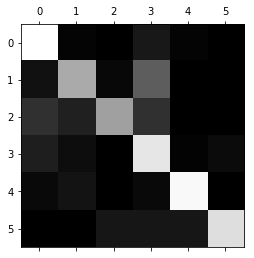

In [5]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
evaluate(model)

<h2>SVM classifier</h2>

-- Training data --
Accuracy: 79.91%
Confusion Matrix:
[[124   0   0  16   0   0]
 [ 18   2   0  14   0   0]
 [  0   0  16   2   0   0]
 [ 34   0   0 118   0   0]
 [  2   0   0   0  56   0]
 [  0   0   0   0   0  26]]


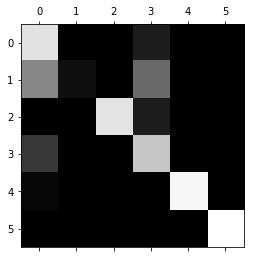


-- 10-fold CV --
Average accuracy: 77.57%
Confusion Matrix:
[[120   0   0  20   0   0]
 [ 18   0   0  16   0   0]
 [  0   0  16   2   0   0]
 [ 38   0   0 114   0   0]
 [  2   0   0   0  56   0]
 [  0   0   0   0   0  26]]


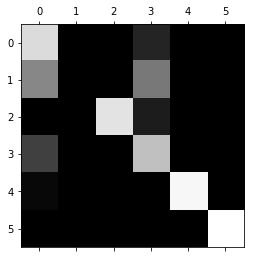

In [6]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

<h2>kNN classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[140   0   0   0   0   0]
 [  0  34   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0 152   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0  26]]


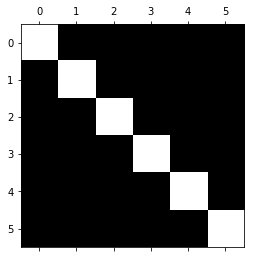


-- 10-fold CV --
Average accuracy: 83.64%
Confusion Matrix:
[[140   0   0   0   0   0]
 [ 12  22   0   0   0   0]
 [  0   0  18   0   0   0]
 [ 28  10   2 112   0   0]
 [  2   0   2   6  48   0]
 [  2   0   0   4   2  18]]


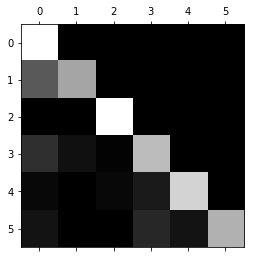

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=2)
evaluate(model)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[140   0   0   0   0   0]
 [  0  34   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0 152   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0  26]]


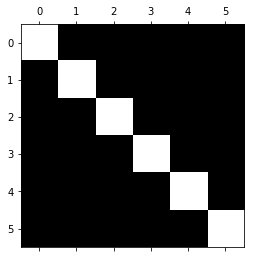


-- 10-fold CV --
Average accuracy: 99.07%
Confusion Matrix:
[[138   0   0   2   0   0]
 [  2  32   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0 152   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0  26]]


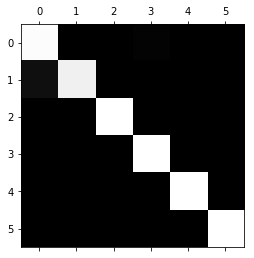

In [8]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

<h2>Plot attributes</h2>

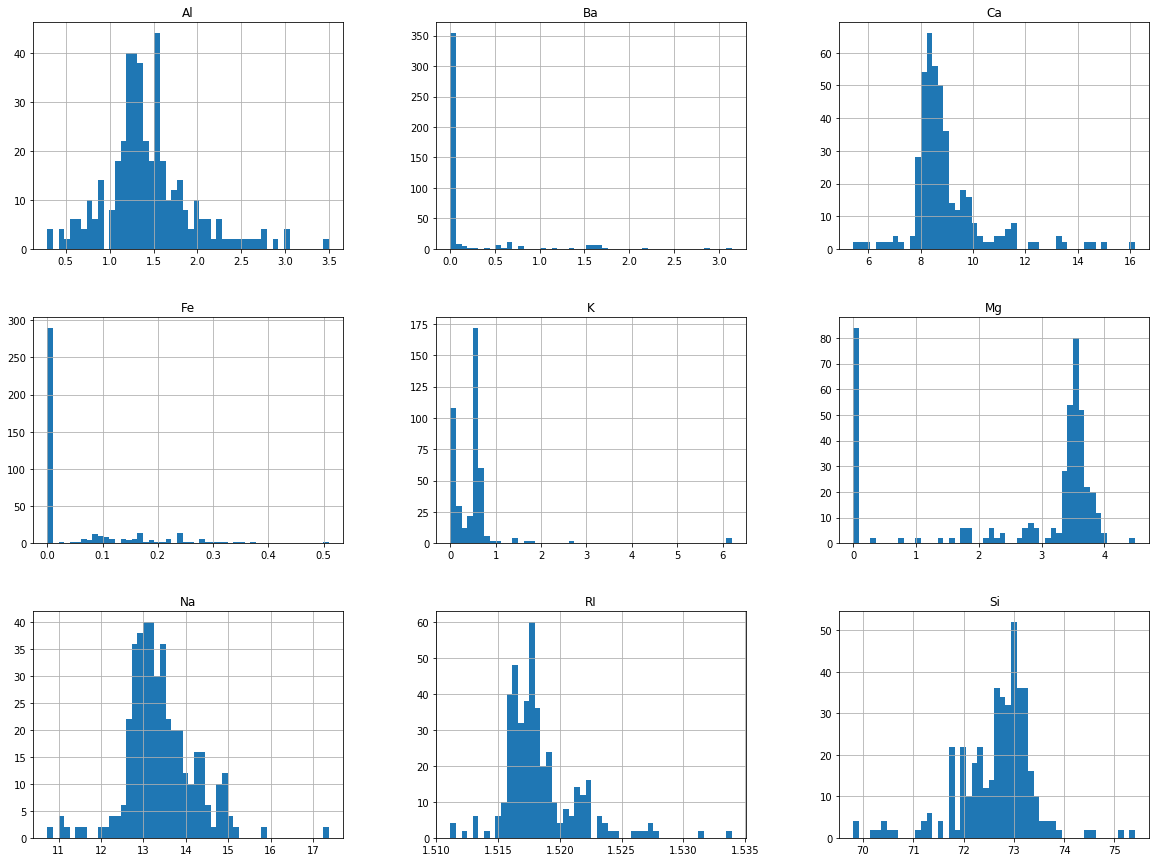

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()